In [13]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import torch
import datasets_2D

device = 'cpu'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(-3.0, 4.0)

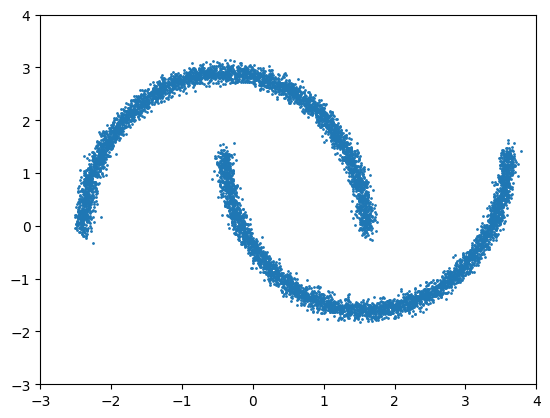

In [22]:
dataset = datasets_2D.get_dataset("moons")

points = dataset.tensors[0]
plt.scatter(points[:, 0], points[:, 1], s=1)
plt.xlim(-3, 4)
plt.ylim(-3, 4)

In [15]:
from diffusers import DDIMScheduler
from model import LowDimensionalDiffusionModel

model = LowDimensionalDiffusionModel(in_features=2).to(device)

B = 1
x = torch.randn(B, 2).to(device)
t = torch.ones(B).to(device)
model(x, t)

tensor([[0.2012, 0.2414]], grad_fn=<AddmmBackward0>)

In [17]:
from ddpm import train_diffusion_model

scheduler = DDIMScheduler(
    num_train_timesteps=50,
    beta_schedule="linear",
    beta_start=0.0001,
    beta_end=0.02,
    clip_sample=False
)

class TrainingConfig:
    num_epochs = 50
    train_batch_size = 32
    learning_rate = 1e-3

train_cfg = TrainingConfig()

model = train_diffusion_model(model, dataset, scheduler, train_cfg, device)

Epoch 49 | Loss: 0.6516: 100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


(-3.0, 4.0)

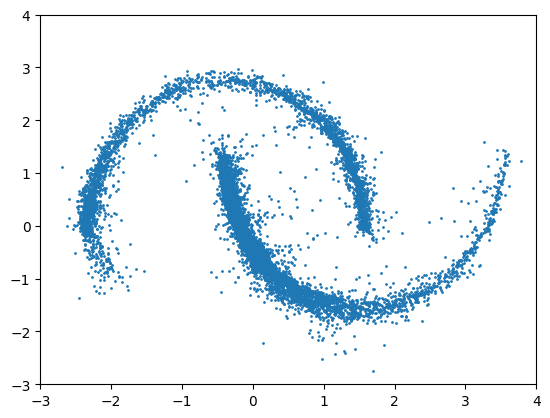

In [26]:
from ddpm import sample_diffusion_model

samples = sample_diffusion_model(
    model, scheduler, (2,), n_samples=10000, n_inference_steps=50
)

samples = samples.cpu().detach().numpy()
plt.scatter(samples[:, 0], samples[:, 1], s=1)
plt.xlim(-3, 4)
plt.ylim(-3, 4)